C:\Users\KIIT\AppData\Local\Temp\ipykernel_3436\4220950915.py:15: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device: cpu
Current working directory: c:\Users\KIIT\Desktop\PROMPT_TO_IMAGE_GENERATION_USING_STABLE_DIFFUSION-main\sd


100%|██████████| 50/50 [12:53<00:00, 15.47s/it]


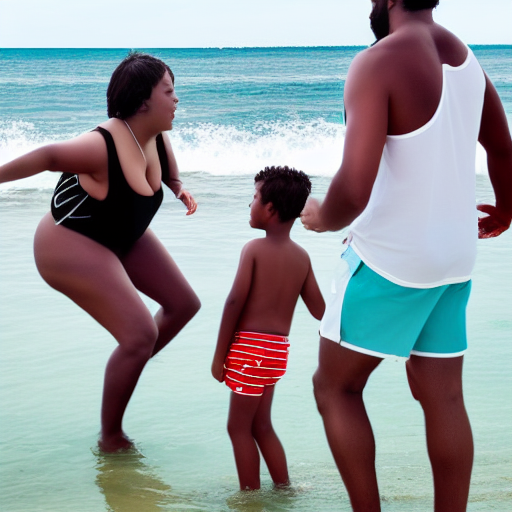

In [3]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")
import os
print("Current working directory:", os.getcwd())

# put the path to your data folder files!!!
tokenizer = CLIPTokenizer("C:\\Users\\KIIT\\Desktop\\PROMPT_TO_IMAGE_GENERATION_USING_STABLE_DIFFUSION-main\\data\\vocab.json", merges_file="C:\\Users\\KIIT\\Desktop\\PROMPT_TO_IMAGE_GENERATION_USING_STABLE_DIFFUSION-main\\data\\merges.txt")
model_file = "C:\\Users\\KIIT\\Desktop\\PROMPT_TO_IMAGE_GENERATION_USING_STABLE_DIFFUSION-main\\data\\v1-5-pruned-emaonly.ckpt"

models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

#prompt = "A man holding a dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
#prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt=" a couple near a beach wearing swimming suit with two children playing with football, man with white skin and children black skin."
#prompt="A cat eating chicken with a dog ,highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
#prompt="A parrot with yellow ,green and red wings and a pink  beak and blue neck flying above a river,highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
#prompt="A big blue house with black windows, black doors with white stripes, a beautiful terrace, a big swimming pool, a garden, a swing, and an elegant boundary and a couple is sitting in the swing wearing pink clothes and fireworks in  sky. Greenery all around with many flowers having dots..highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution"
#prompt="A brown cat wearing police dress and black sunglasses riding a bike ,highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
) 

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)